# Data and Library

In [1]:
#pip install pmdarima

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pmdarima as pm

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import permutations
from datetime import datetime
import pytz

In [3]:
#Read all csv files
customer = pd.read_csv("C:\Kuliah\INTERNSHIPS\Kalbe Nutritionals Internship\Final Project\Data\Customer.csv")
transaction = pd.read_csv("C:\Kuliah\INTERNSHIPS\Kalbe Nutritionals Internship\Final Project\Data\Transaction.csv")
product = pd.read_csv("C:\Kuliah\INTERNSHIPS\Kalbe Nutritionals Internship\Final Project\Data\Product.csv")
store = pd.read_csv("C:\Kuliah\INTERNSHIPS\Kalbe Nutritionals Internship\Final Project\Data\Store.csv")

In [4]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [5]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,1/1/2022,P3,7500,4,30000,12
1,TR16356,165,1/1/2022,P9,10000,7,70000,1
2,TR1984,183,1/1/2022,P1,8800,4,35200,4
3,TR35256,160,1/1/2022,P1,8800,7,61600,4
4,TR41231,386,1/1/2022,P9,10000,1,10000,4


In [6]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [7]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [8]:
# Merge all data into a united new dataframe
df = pd.merge(transaction,customer,on='CustomerID')
df = pd.merge(df,product,on='ProductID', suffixes=('_Customer','_Product'))
df = pd.merge(df,store,on='StoreID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_Customer,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_Product,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,8/1/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/1/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


# Data Cleaning

# Check Data Type

In [9]:
df.dtypes

TransactionID     object
CustomerID         int64
Date              object
ProductID         object
Price_Customer     int64
Qty                int64
TotalAmount        int64
StoreID            int64
Age                int64
Gender             int64
Marital Status    object
Income            object
Product Name      object
Price_Product      int64
StoreName         object
GroupStore        object
Type              object
Latitude          object
Longitude         object
dtype: object

Kita akan mengubah data type variabel "Date" menjadi datetime dan variabel "Income" menjadi float dengan pemisah desimal berupa "."

In [10]:
#Convert date and income data type
df['Date'] = pd.to_datetime(df['Date'])
df['Income'] = df['Income'].map(lambda x: float(x.replace(',','.')))

df.head()

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_26532\4158832533.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,TransactionID,CustomerID,Date,ProductID,Price_Customer,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_Product,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


# Drop Irrelevant Columns

In [11]:
# Drop irrelevant columns
df = df.drop(columns=['Latitude','Longitude'])
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_Customer,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_Product,StoreName,GroupStore,Type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade


# Check Missing Value

In [12]:
df.isna().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_Customer     0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
Product Name       0
Price_Product      0
StoreName          0
GroupStore         0
Type               0
dtype: int64

Variabel Marital Status memiliki missing value, maka akan dilakukan imputasi terhadap missing value menggunakan K-Nearest Neighbour Method

In [13]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit the encoder to the Marital Status variable and transform it
df['Marital Status'] = le.fit_transform(df['Marital Status'])

# Print the encoded values
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_Customer,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_Product,StoreName,GroupStore,Type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,0,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,1,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,0,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,1,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,0,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade


In [14]:
#Impute nan values using KNNImputer
#Lets use customer data to support imputer process
df_impute = df[['Age','Gender','Income','Marital Status']]

imputer = KNNImputer(n_neighbors=2)
df_impute = imputer.fit_transform(df_impute)
df_impute = pd.DataFrame(data=df_impute,columns=['Age','Gender','Income','Marital Status'])

print('Missing Value :',df_impute.isna().sum())

Missing Value : Age               0
Gender            0
Income            0
Marital Status    0
dtype: int64


In [15]:
df['Marital Status'] = df_impute["Marital Status"].astype('int')
df.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_Customer    0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
Price_Product     0
StoreName         0
GroupStore        0
Type              0
dtype: int64

In [16]:
df.dtypes

TransactionID             object
CustomerID                 int64
Date              datetime64[ns]
ProductID                 object
Price_Customer             int64
Qty                        int64
TotalAmount                int64
StoreID                    int64
Age                        int64
Gender                     int64
Marital Status             int32
Income                   float64
Product Name              object
Price_Product              int64
StoreName                 object
GroupStore                object
Type                      object
dtype: object

# Export the Merged Cleaned Data

In [17]:
# Export the cleaned data into a csv format
df.to_csv('C:\Kuliah\INTERNSHIPS\Kalbe Nutritionals Internship\Final Project\Data\Merged_Data.csv', index=False)

# Time Series Analysis (Machine Learning)

In [18]:
df_tsa = df.groupby('Date')[['Qty']].sum()
df_tsa

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


<Axes: xlabel='Date'>

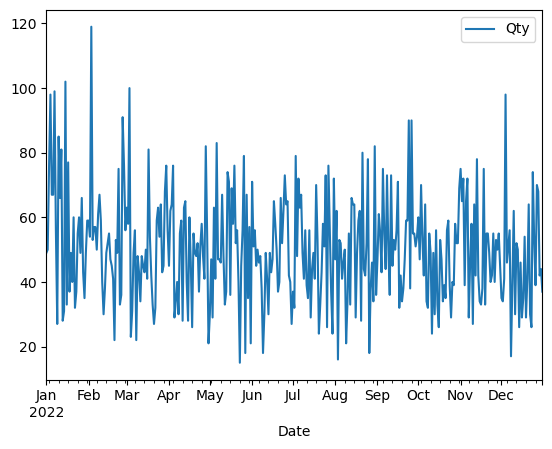

In [19]:
df_tsa.plot()

# Training and Testing Data Split

In [20]:
#Split train and test
df_train = df_tsa.iloc[:-31]
df_test = df_tsa.iloc[-31:]

# Pengecekan Stasioneritas Data

Hipotesis uji stasioner data deret waktu menggunakan Augmented Dickey-Fuller (ADF) adalah:

H0 : data tidak stasioner </br>
H1 : data stasioner

In [21]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 2.44017311003304e-30


Nilai P-Value = 2.44 x 10^-30 < alpha = 0.05 sehingga tolak H0. Maka, diperoleh kesimpulan bahwa data stasioner sehingga pemodelan ARIMA dapat dilanjutkan.

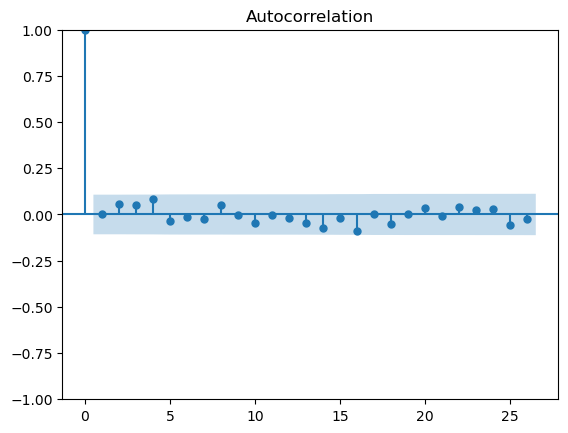

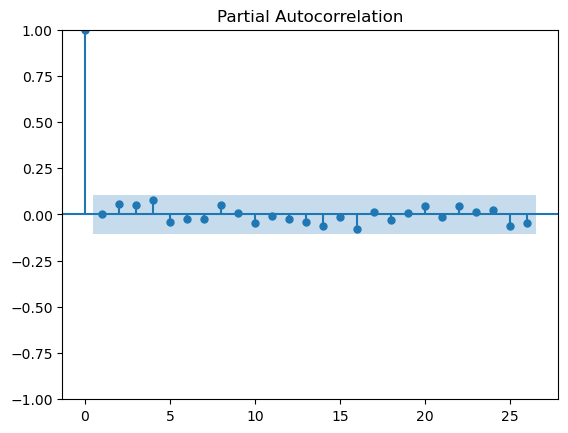

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

Seperti yang terlihat pada gambar di atas, plot ACF dan PACF memiliki pola cuts off. Pada plot ACF lag yang signifikan adalah lag 1, dan pada plot PACF lag yang signifikan juga merupakan lag 1. Sehingga dapat diketahui model dugaannya adalah ARIMA
(1, 0, 0) dan ARIMA (0, 0, 1).

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                  334
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1412.447
Date:                Sat, 30 Sep 2023   AIC                           2830.895
Time:                        22:12:54   BIC                           2842.328
Sample:                    01-01-2022   HQIC                          2835.453
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5329      0.970     52.076      0.000      48.631      52.435
ar.L1          0.0008      0.055      0.015      0.988      -0.107       0.109
sigma2       275.8592     19.768     13.955      0.0

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Parameter Tuning Data Training

In [24]:
#Manual parameter tuning
def tune(z,y,x):
    model = ARIMA(df_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_test))
    df_plot = df_tsa[['Qty']].iloc[-61:]

    df_plot['forecast'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)
    
    MAE = mean_absolute_error(df_test, forecast_test)
    MAPE = mean_absolute_percentage_error(df_test, forecast_test)
    RMSE = np.sqrt(mean_squared_error(df_test, forecast_test))
    
    return MAE,MAPE,RMSE
    
#Parameter combinations
p = [1,0]
d = [0]
q = [0,1]

comb = []
for i in p:
    for j in d:
        for k in q:
            comb.append((i,j,k))

parameter = []
MAE_score = []
MAPE_score = []
RMSE_score = []

for i in comb:
    parameter.append(i)
    score = tune(*i)
    MAE_score.append(score[0])
    MAPE_score.append(score[1])
    RMSE_score.append(score[2])
    
tuning_df = pd.DataFrame({'Parameter':parameter,'MAE':MAE_score,'MAPE':MAPE_score,'RMSE':RMSE_score})
tuning_df.sort_values(by='MAE').head()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodel

,Parameter,MAE,MAPE,RMSE
1,"(1, 0, 1)",14.209583,0.388313,17.496043
3,"(0, 0, 1)",14.219090,0.388595,17.499637
0,"(1, 0, 0)",14.219107,0.388596,17.499652
2,"(0, 0, 0)",14.219237,0.388600,17.499767


Diputuskan untuk menggunakan parameter pdq ARIMA (1,0,1) karena memiliki nilai MAPE terkecil

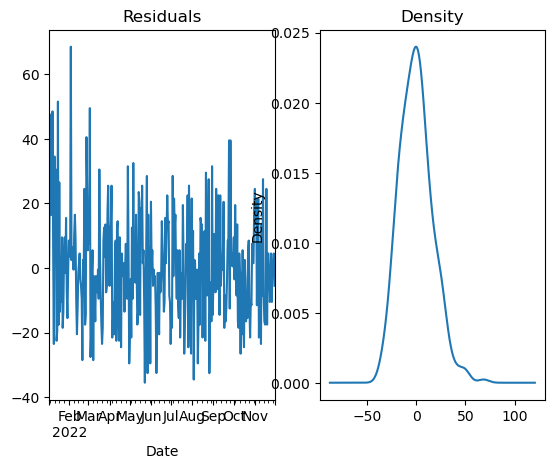

In [25]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [26]:
#Manual parameter tuning
model = ARIMA(df_train, order=(1, 0, 1))
model_fit = model.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


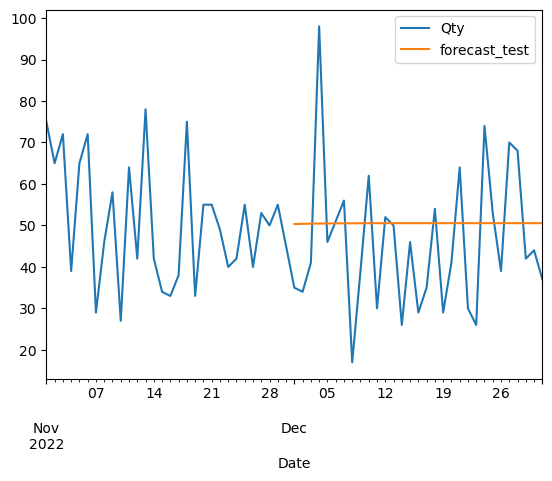

In [27]:
#plot forecasting
forecast_test = model_fit.forecast(len(df_test))

df_plot = df_tsa[['Qty']].iloc[-61:]

df_plot['forecast_test'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)

df_plot.plot()
plt.show()

# Overall Quantity of Product Sold Forecasting

In [28]:
#Overall Quantity Forecasting
model = ARIMA(df_tsa, order=(1, 0, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=31)

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inverti

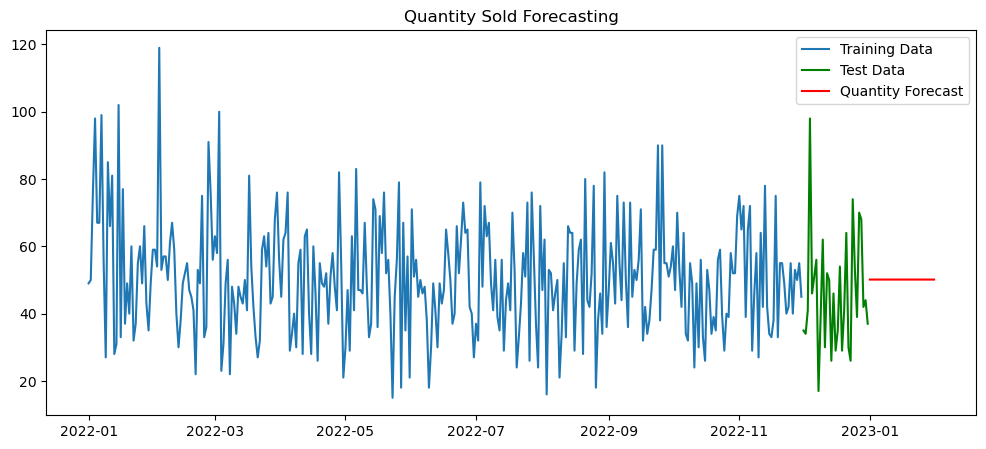

In [29]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_train, label='Training Data')
plt.plot(df_test, color='green', label='Test Data')
plt.plot(forecast,color='red', label= 'Quantity Forecast')
plt.title('Quantity Sold Forecasting')
plt.legend()
plt.show()

In [30]:
forecast.mean()

50.1262232207751

Berdasarkan hasil forecast di atas, diketahui bahwa estimasi kuantitas penjualan harian pada bulan januari 2023 adalah sekitar 51 pcs produk per hari (50.1262 dibulatkan ke atas).

# Quantity of Each Product Forecast

In [31]:
#Forecasting the quantity of each product for the next 31 days (January 2023 have 31 days in 1 month)
product_name = df['Product Name'].unique()

dfprod = pd.DataFrame({'Date':pd.date_range(start='2023-01-01',end='2023-01-31')})
dfprod = dfprod.set_index('Date')
for i in product_name:
    df1 = df[['Date','Product Name','Qty']]
    df1 = df1[df1['Product Name']==i]
    df1 = df1.groupby('Date')[['Qty']].sum()
    df1 = df1.reset_index()
    df_prod = pd.DataFrame({'Date':pd.date_range(start='2022-01-01',end='2022-12-31')})
    df_prod = df_prod.merge(df1, how='left', on='Date')
    df_prod = df_prod.fillna(0)
    df_prod = df_prod.set_index('Date')
    
    model1 = ARIMA(df_prod, order=(1,0,1))
    model1_fit = model1.fit()
    forecast1 = model1_fit.forecast(steps=31)
    dfprod[i] = forecast1.values
    
dfprod.head()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodel

,Crackers,Oat,Thai Tea,Choco Bar,Coffee Candy,Yoghurt,Ginger Candy,Cheese Stick,Cashew,Potato Chip
Date,,,,,,,,,,
2023-01-01,5.362668,2.682005,8.234507,6.918451,6.514025,5.291034,7.022506,5.043507,1.733288,3.082908
2023-01-02,4.810320,2.638355,7.536729,6.563289,6.480095,5.405974,7.235970,5.044549,1.712608,3.003115
2023-01-03,5.092543,2.644572,8.007669,6.601474,6.447650,5.370513,7.183733,5.044614,1.719941,2.993360
2023-01-04,4.948341,2.643686,7.689826,6.597368,6.416626,5.381453,7.196516,5.044618,1.717341,2.992167
2023-01-05,5.022021,2.643812,7.904342,6.597810,6.386960,5.378078,7.193388,5.044619,1.718263,2.992021


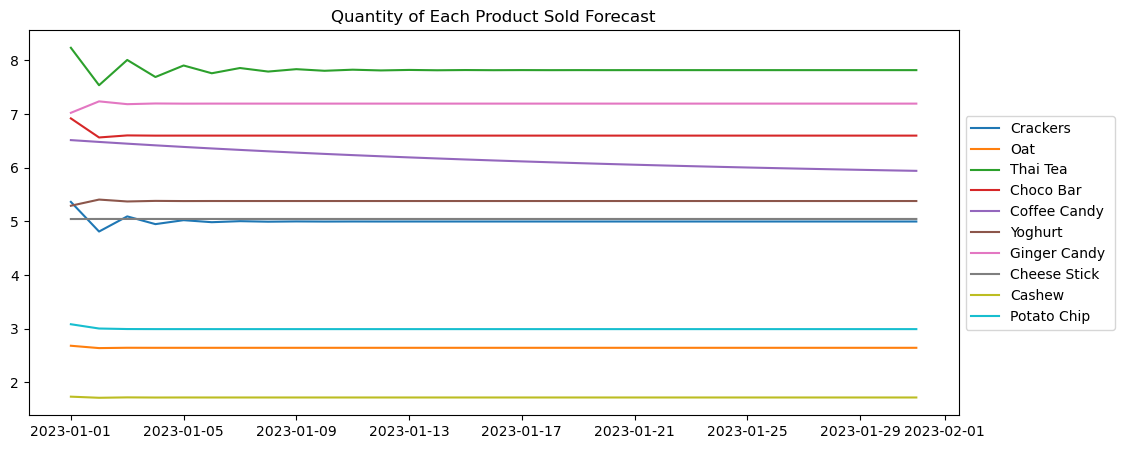

In [32]:
#Forecasting Plot
plt.figure(figsize=(12,5))
plt.plot(dfprod)
plt.legend(dfprod.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Quantity of Each Product Sold Forecast')
plt.show()

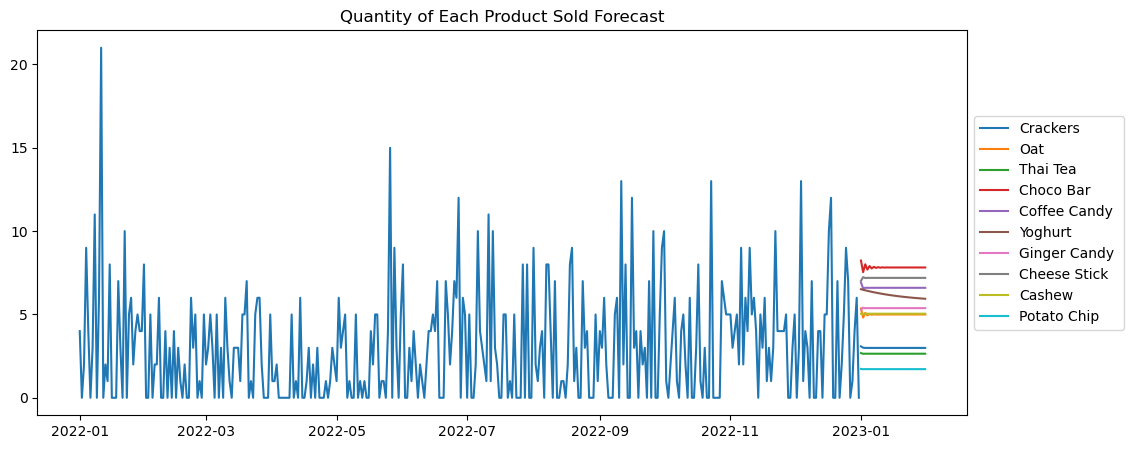

In [33]:
#Plot forecasting
plt.figure(figsize=(12,5))
plt.plot(df_prod)
plt.plot(dfprod, label= 'Quantity of Each Product Forecast')
plt.title('Quantity of Each Product Sold Forecast')
plt.legend(dfprod.columns, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [34]:
#Quantity of Each Product Sold forecast
round(dfprod.describe().T['mean'],0)

Crackers         5.0
Oat              3.0
Thai Tea         8.0
Choco Bar        7.0
Coffee Candy     6.0
Yoghurt          5.0
Ginger Candy     7.0
Cheese Stick     5.0
Cashew           2.0
Potato Chip      3.0
Name: mean, dtype: float64

Dari forecasting terhadap tiap produk yang terjual, diperkirakan pada bulan depan rata-rata produk Crackers akan terjual sebanyak 5 pcs per hari, Oat terjual sebanyak 3 pcs per hari, Thai Tea sebanyak 8 pcs per hari, Choco Bar sebanyak 7 pcs per hari, Coffee Candy sebanyak 6 pcs per hari, Yoghurt sebanyak 5 pcs per hari, Ginger Candy sebanyak 7 pcs per hari, Cheese Stick sebanyak 5 pcs per hari, Cashew sebanyak 2 pcs per hari, dan Potato Chip sebanyak 3 pcs per hari. Informasi ini dapat digunakan sebagai insight terhadap tim inventory untuk membuat stock persediaan harian yang cukup dan efektif.